# **LINEAR REGRESSION BLOCK START**

In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
def load_dataset():
    """ Reads dataset csv and returns pandas dataframe """
    
    filepath = "/content/Hitters_Adjusted_Salary.csv"

    df = pd.read_csv(filepath, encoding="utf-8", low_memory=False)
    
    return df

In [3]:
def clean_dataset(a_df):
    """ Returns deduped, na-dropped, index-reset dataframe """    
    
    a_df = a_df.drop_duplicates()   
        
    a_df = a_df.dropna()
    
    a_df = a_df.drop(["Unnamed: 0", "yearID", "playerID", "teamID", "lgID", "salary", "PO", "A", "E", "DP"], axis=1)
        
    a_df = a_df.reset_index(drop=True)
    
    return a_df  

In [4]:
def rename_columns(a_df):
    """ Returns dataframe with meaningful column names """    
    
    abbr_dict = {"GS": "games_started", "InnOuts": "inning_outs", "G": "games_played", "AB": "at_bats",\
                "R": "runs", "H": "hits", "2B": "doubles", "3B": "triples", "HR": "home_runs",\
                "RBI": "runs_batted_in", "SB": "stolen_bases", "CS": "caught_stealing", "BB": "base_on_balls",\
                "SO": "strike_outs", "IBB": "intentional_walks", "HBP": "hit_by_pitch", "SH": "sacrifice_hits",\
                "SF": "sacrifice_flies", "GIDP": "ground_into_double_play"}
    
    a_df = a_df.rename(columns=abbr_dict)
    
    return a_df   

In [5]:
def examine_dataset(a_df):
    """ Provides summary info and visualizations of dataset """
    
    print(a_df.info())
           
    print(f'\n\nADJ SALARY VALUE COUNTS: \n {a_df["ADJ Salary"].value_counts()}\n\n')
    
    a_df.hist(figsize = (15, 15))  

In [6]:
def scale_dataset(a_df):
    """ Returns dataframe with target column removed, data scaled with standard scaler, data normalized, and labels """
    
    salary_labels = a_df["ADJ Salary"]    
    no_target_df = a_df.drop(columns=["ADJ Salary"])
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(no_target_df)    
    print(f"SHAPE AFTER SCALING: {scaled_data.shape}")

    return no_target_df, scaled_data, salary_labels

In [7]:
def round_salaries(a_df):
  """ Returns dataframe with salary column made into int and rounded """

  a_df["ADJ Salary"] = a_df["ADJ Salary"].astype("int").round()

  return a_df

In [8]:
def run_regression(a_df):
  """ Runs linear regression on dataframe, prints model scores """
  
  # Assign X and y

  X = a_df.drop(["ADJ Salary"], axis=1)
  y = a_df["ADJ Salary"]

  # Split the data into X_train, X_test, y_train, y_test

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

  # Create a scaler to standardize the data

  scaler = StandardScaler()

  # Train the scaler with the X_train data.

  scaler.fit(X_train)

  # Transform X_train and X_test.

  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  model = LinearRegression().fit(X_train_scaled, y_train)

  # Score the model

  print(f"Linear Regression Training Data Score: {model.score(X_train_scaled, y_train)}")
  print(f"Linear Regression Testing Data Score: {model.score(X_test_scaled, y_test)}")

In [9]:
def run_LASSO(a_df):
  """ Runs LASSO regression on dataframe, prints model scores """
  
  # Assign X and y

  X = a_df.drop(["ADJ Salary"], axis=1)
  y = a_df["ADJ Salary"]

  # Split the data into X_train, X_test, y_train, y_test

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

  # Create a scaler to standardize the data

  scaler = StandardScaler()

  # Train the scaler with the X_train data.

  scaler.fit(X_train)

  # Transform X_train and X_test.

  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  lasso_reg = Lasso(max_iter=10_000).fit(X_train, y_train)

  print(f"LASSO coef_: {lasso_reg.coef_}")

  # Score the model

  print(f"LASSO Regression Training Data Score: {lasso_reg.score(X_train_scaled, y_train)}")
  print(f"LASSO Regression Testing Data Score: {lasso_reg.score(X_test_scaled, y_test)}")

  plt.bar(X.columns, lasso_reg.coef_)
  plt.show()

In [10]:
def run_Ridge(a_df):
  """ Runs Ridge regression on dataframe, prints model scores """
  
  # Assign X and y

  X = a_df.drop(["ADJ Salary"], axis=1)
  y = a_df["ADJ Salary"]

  # Split the data into X_train, X_test, y_train, y_test

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

  # Create a scaler to standardize the data

  scaler = StandardScaler()

  # Train the scaler with the X_train data.

  scaler.fit(X_train)

  # Transform X_train and X_test.

  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  ridge_reg = Ridge(alpha=100).fit(X_train, y_train)

  print(f"Ridge coef_: {ridge_reg.coef_}")

  # Score the model

  print(f"Ridge Regression Training Data Score: {ridge_reg.score(X_train_scaled, y_train)}")
  print(f"Ridge Regression Testing Data Score: {ridge_reg.score(X_test_scaled, y_test)}")

  plt.bar(X.columns, ridge_reg.coef_)
  plt.show()

In [11]:
def run_ElasticNet(a_df):
  """ Runs ElasticNet regression on dataframe, prints model scores """
  
  # Assign X and y

  X = a_df.drop(["ADJ Salary"], axis=1)
  y = a_df["ADJ Salary"]

  # Split the data into X_train, X_test, y_train, y_test

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

  # Create a scaler to standardize the data

  scaler = StandardScaler()

  # Train the scaler with the X_train data.

  scaler.fit(X_train)

  # Transform X_train and X_test.

  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  elasticnet_reg = ElasticNet(alpha=10).fit(X_train, y_train)

  print(f"ElasticNet coef_: {elasticnet_reg.coef_}")

  # Score the model

  print(f"ElasticNet Regression Training Data Score: {elasticnet_reg.score(X_train_scaled, y_train)}")
  print(f"ElasticNet Regression Testing Data Score: {elasticnet_reg.score(X_test_scaled, y_test)}")

  plt.bar(X.columns, elasticnet_reg.coef_)
  plt.show()

In [12]:
loaded_df = load_dataset()

In [13]:
clean_df = clean_dataset(loaded_df)

In [14]:
clean_df = rename_columns(clean_df)

In [15]:
clean_df.head(10)

,ADJ Salary,games_started,inning_outs,games_played,at_bats,runs,hits,doubles,triples,home_runs,runs_batted_in,stolen_bases,caught_stealing,base_on_balls,strike_outs,intentional_walks,hit_by_pitch,sacrifice_hits,sacrifice_flies,ground_into_double_play
0,1.310892e+06,67.0,1698.0,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,1.503317e+06,76.0,2097.0,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,1.924245e+06,27.0,814.0,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,6.013267e+05,124.0,3299.0,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,3.607960e+06,125.0,3196.0,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
5,1.094415e+06,130.0,3425.0,142,439,51,102,21,0,5,39.0,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0
6,1.864113e+06,113.0,3009.0,130,444,52,123,25,2,8,61.0,6.0,7.0,37,57.0,8.0,0.0,1.0,6.0,9.0
7,3.908623e+06,161.0,4264.0,162,616,118,185,32,2,37,111.0,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0
8,1.483273e+06,113.0,3041.0,134,412,30,112,19,4,3,35.0,1.0,2.0,51,38.0,6.0,6.0,1.0,2.0,10.0
9,2.886368e+05,50.0,1325.0,110,238,22,51,5,0,3,13.0,9.0,5.0,23,28.0,1.0,0.0,0.0,1.0,7.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15023 entries, 0 to 15022
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ADJ Salary               15023 non-null  float64
 1   games_started            15023 non-null  float64
 2   inning_outs              15023 non-null  float64
 3   games_played             15023 non-null  int64  
 4   at_bats                  15023 non-null  int64  
 5   runs                     15023 non-null  int64  
 6   hits                     15023 non-null  int64  
 7   doubles                  15023 non-null  int64  
 8   triples                  15023 non-null  int64  
 9   home_runs                15023 non-null  int64  
 10  runs_batted_in           15023 non-null  float64
 11  stolen_bases             15023 non-null  float64
 12  caught_stealing          15023 non-null  float64
 13  base_on_balls            15023 non-null  int64  
 14  strike_outs           

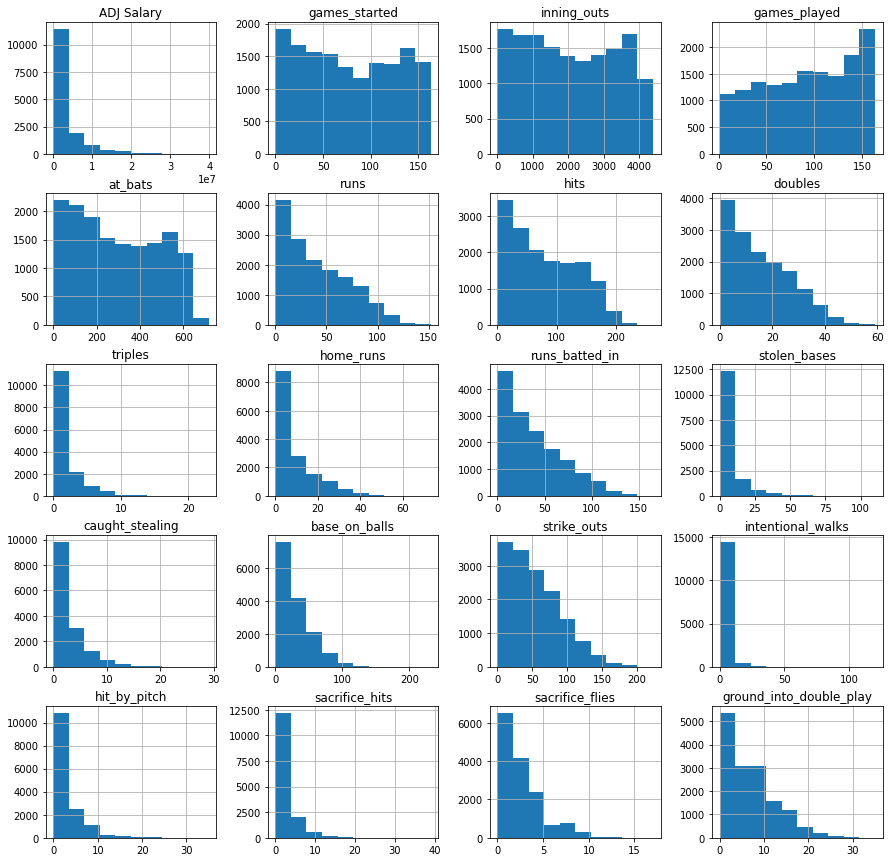

In [16]:
examine_dataset(clean_df)

In [17]:
clean_df = round_salaries(clean_df)

In [18]:
run_regression(clean_df)

Linear Regression Training Data Score: 0.2769956425847886
Linear Regression Testing Data Score: 0.28064339079672496


LASSO coef_: [ 136048.70673927   -4660.01970379  -39811.2290833     8873.62425212
   26625.72375985   -2195.7653946   -35111.49371518 -190352.47464784
   43070.7329959    -3214.41313454   34548.06035935 -221000.68113443
   30274.64165861   -6001.47656088   91942.41047903   63639.36363603
 -132057.69755912  -26853.68928282   85049.36313329]
LASSO Regression Training Data Score: -0.002701828412420504
LASSO Regression Testing Data Score: -0.018851279434425994


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


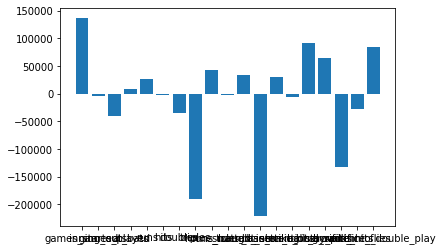

In [19]:
run_LASSO(clean_df)

Ridge coef_: [ 135945.89421356   -4656.36728242  -39830.09361161    8873.17032065
   26567.70394045   -2199.67374378  -35047.91919949 -189748.64221112
   43161.0191241    -3197.40762924   34405.80883471 -220513.21116166
   30303.93952445   -6006.82139075   91837.36921094   63603.40372066
 -131879.57385447  -26755.01429176   85049.64913668]
Ridge Regression Training Data Score: -0.0026430971199715714
Ridge Regression Testing Data Score: -0.01878556869099235


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


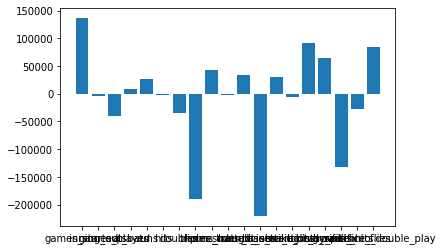

In [20]:
run_Ridge(clean_df)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.135e+16, tolerance: 2.197e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"


ElasticNet coef_: [  94900.01274713   -3167.09635556  -45542.2879392     8835.40627425
   13769.74275108   -2301.99329254  -19307.15233999  -74095.33453524
   50778.17510996    7991.5099891     -798.70749215 -101819.86197304
   37392.04229107   -6457.37244263   58556.51398807   43817.72740621
  -77225.56667606  -10915.75595809   67983.34573226]
ElasticNet Regression Training Data Score: -0.0021067508202674556
ElasticNet Regression Testing Data Score: -0.016850884607542804


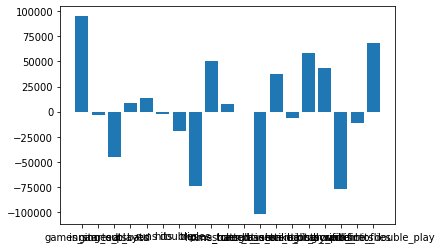

In [21]:
run_ElasticNet(clean_df)

# **LINEAR REGRESSION BLOCK END**

# **PCA START BLOCK**

# **PCA END BLOCK**
